Using the john tukey's rule 

In [1]:
import pandas as pd

In [2]:
data_titanic = pd.read_csv('/Users/strangemax/Library/Mobile Documents/iCloud~AsheKube~Carnets/Documents/Alt/alt/data/Titanic-Dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/strangemax/Library/Mobile Documents/iCloud~AsheKube~Carnets/Documents/Alt/alt/data/Titanic-Dataset.csv'

In [3]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# featured column
data_titanic['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [6]:
#import visualization
import seaborn as sns

<Axes: xlabel='Age'>

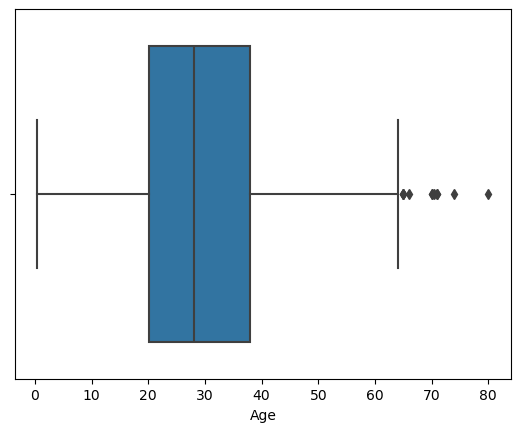

In [ ]:
sns.boxplot(data=data_titanic, x='Age') # box plot

In [8]:
data_titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


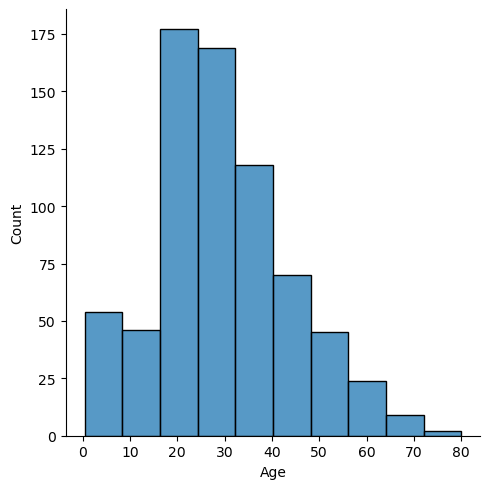

In [ ]:
sns.displot(data=data_titanic, x='Age', bins=10, kde=False) # distribution plot

<Axes: xlabel='Age', ylabel='Fare'>

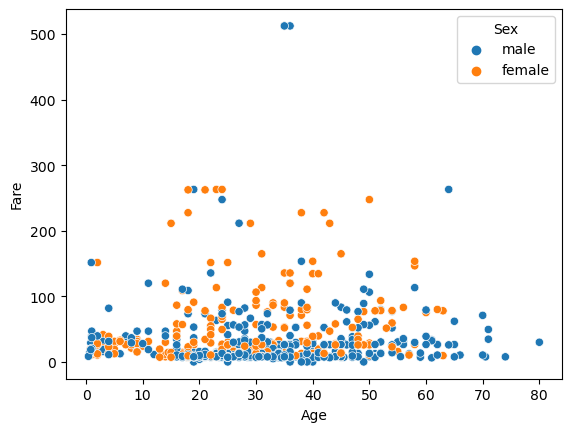

In [16]:
sns.scatterplot(data=data_titanic, x='Age', y='Fare', hue='Sex')

In [ ]:
# Tukey's
# Q1 - 1.5 * IQR - Lower Limit
# Q3 + 1.5 * IQR - Upper Limit
# The median is not influenced by outliers

In [21]:
Q1 = data_titanic['Age'].quantile(.25)
Q3 = data_titanic['Age'].quantile(.75)
IQR = Q1 - Q3

In [22]:
IQR

-17.875

In [23]:
lower_limits = Q1 - 1.5 * IQR
upper_limit = Q3 - 1.5 * IQR

In [24]:
lower_limits # the lowest age within required dataset

46.9375

In [25]:
data_titanic['Age'].min()

0.42

In [ ]:
upper_limit # upper age limit for age that fits in

64.8125

In [27]:
outlier_upper = data_titanic['Age'] > upper_limit

In [28]:
outlier_upper # boolean series showing upper limit

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [33]:
#taking out upper limit value from dataset
len(data_titanic['Age']) - len(data_titanic['Age'][outlier_upper])

880

In [34]:
#removing outlier with the negate bitwise operator 
data_titanic_N = data_titanic[~(outlier_upper)]

In [ ]:
# data with outliers
data_titanic.shape # using the shape attribute

(891, 12)

In [37]:
# data without outliers
data_titanic_N.shape

(880, 12)

In [38]:
data_titanic['Age'][outlier_upper]

33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

<Axes: xlabel='Age'>

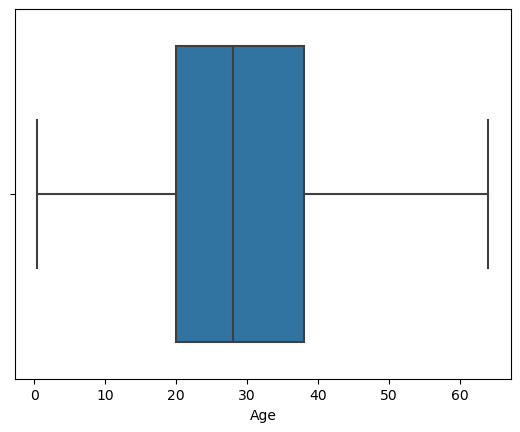

In [39]:
sns.boxplot(data=data_titanic_N, x='Age')

<Axes: xlabel='Age', ylabel='Fare'>

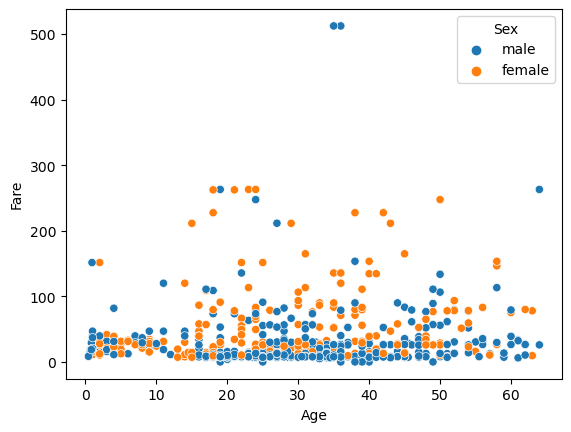

In [40]:
sns.scatterplot(data=data_titanic_N, x='Age', y='Fare', hue='Sex')